<a href="https://colab.research.google.com/github/HinaNitano/EU_M_Math/blob/main/Chap09_Hw_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 9-3-2

In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

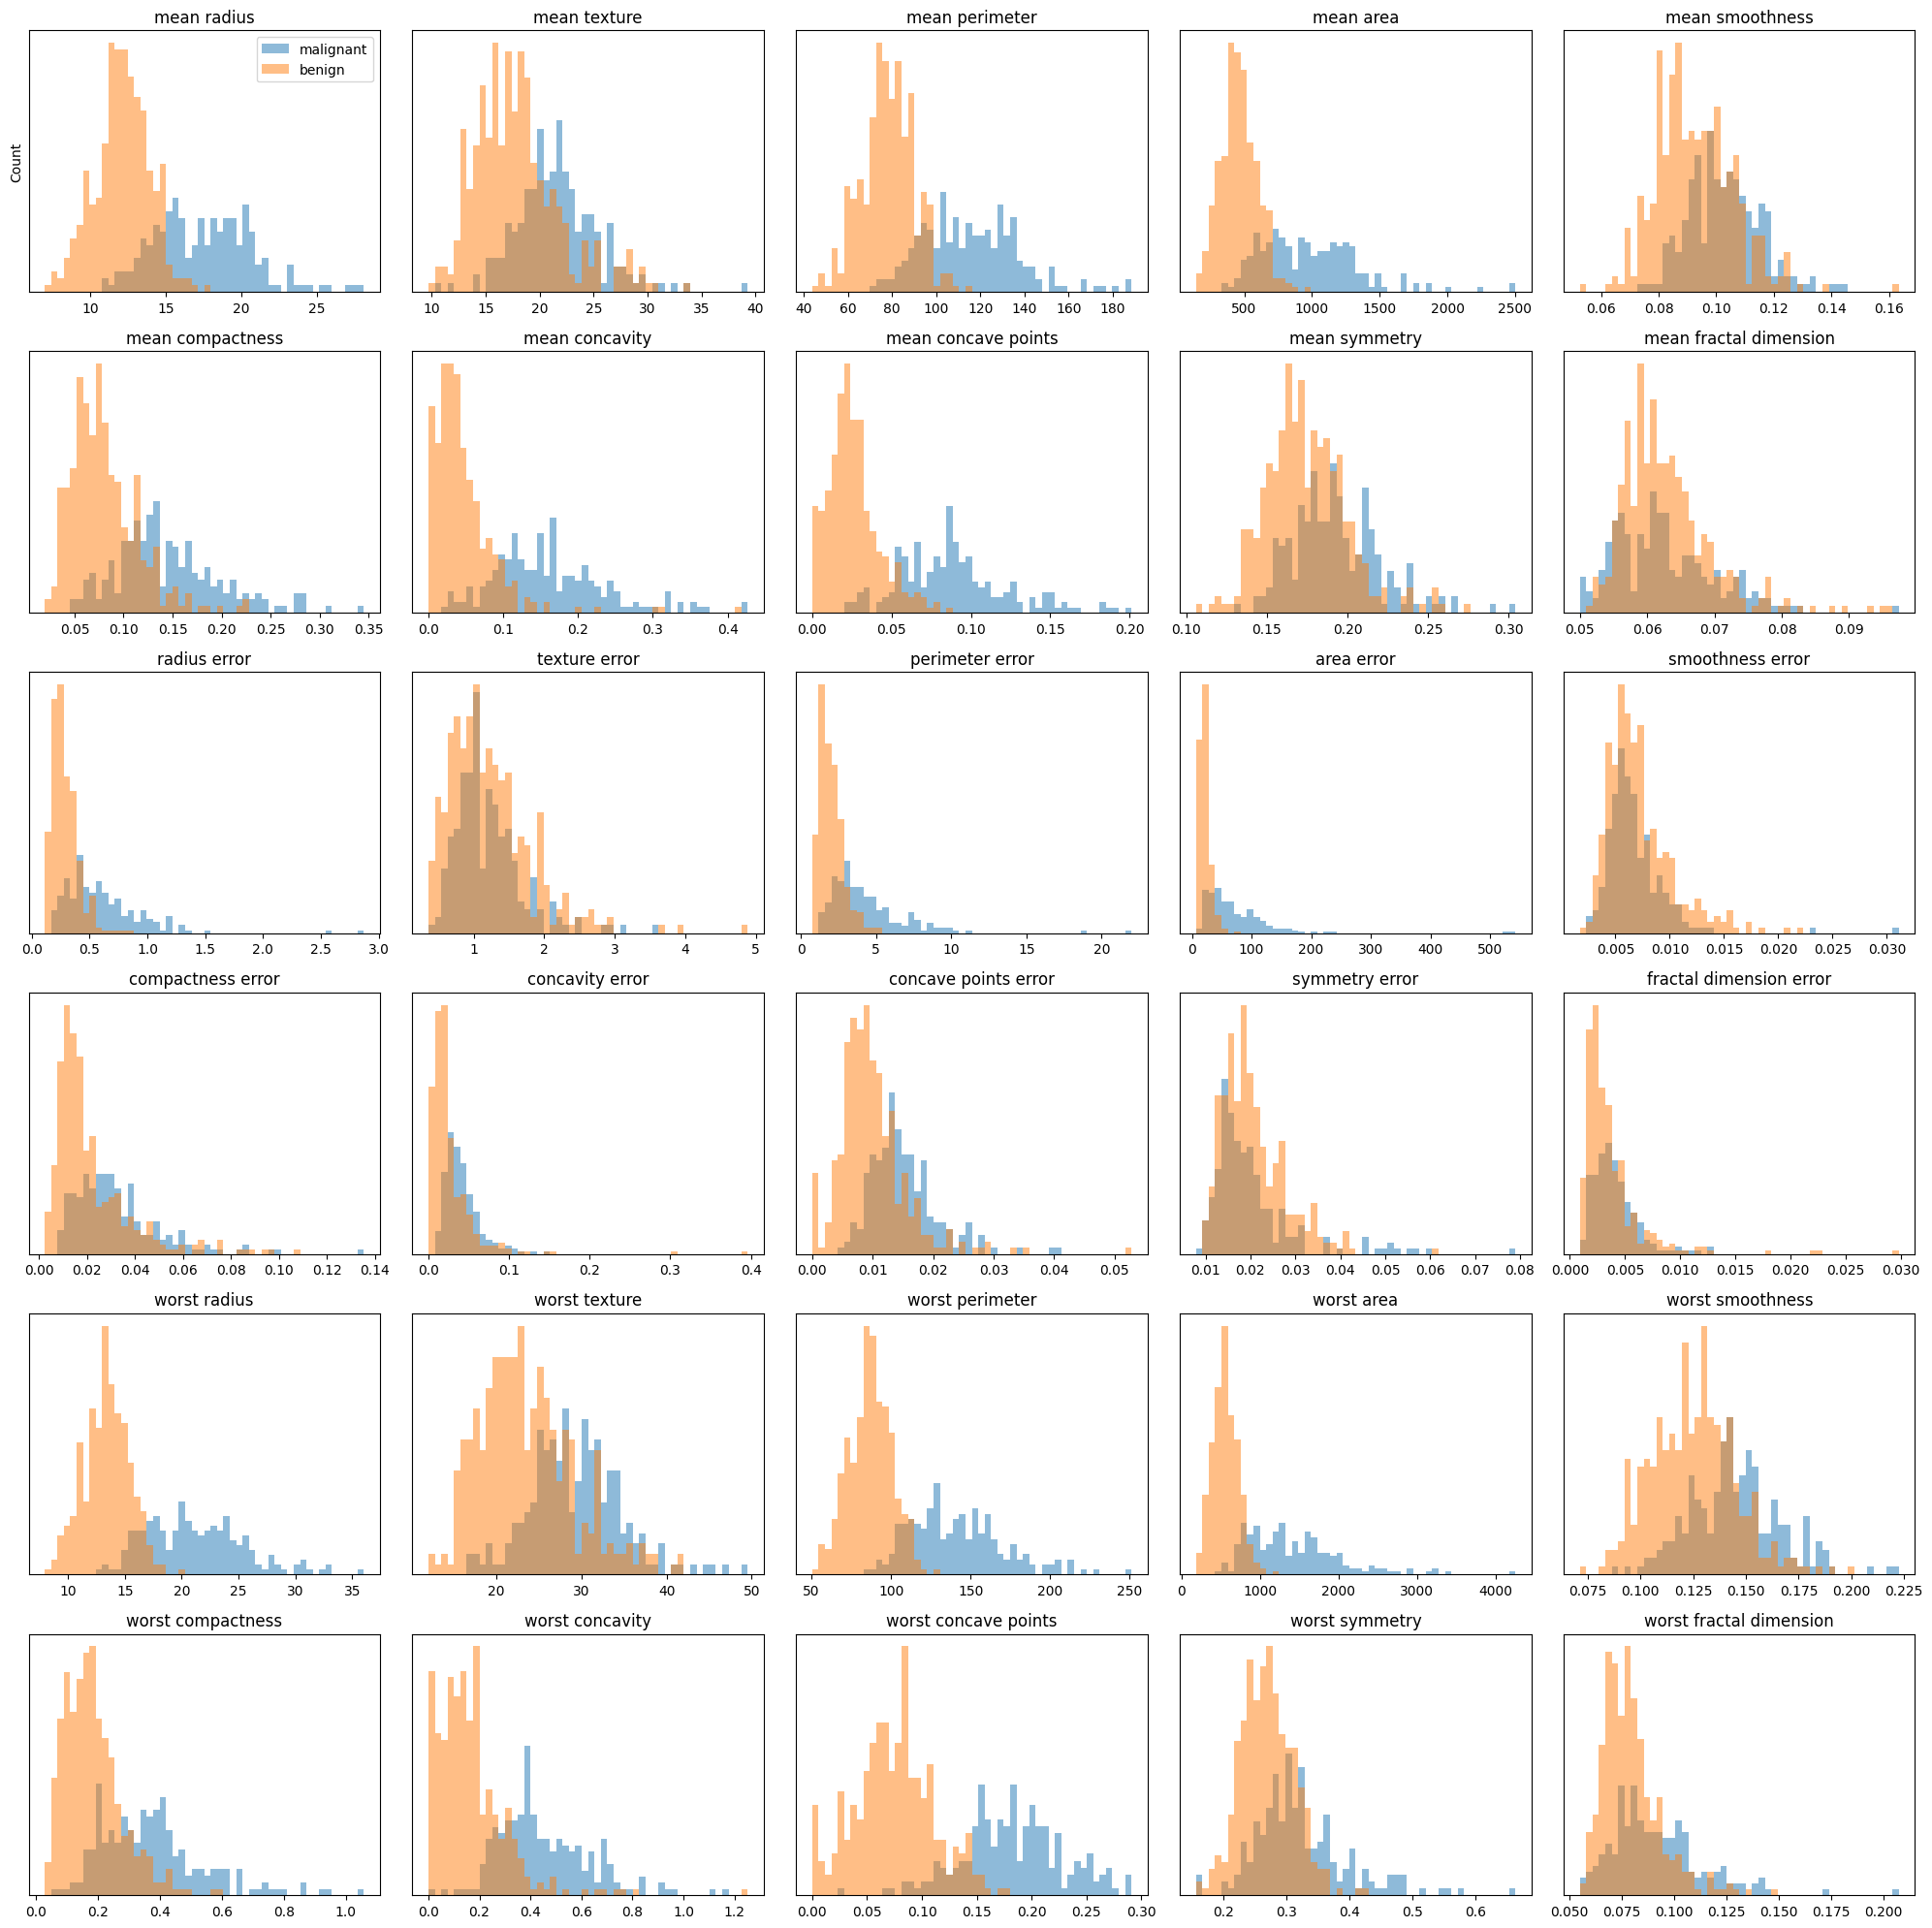

In [3]:
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

# 乳がんデータの取得
cancer = load_breast_cancer()

# データをmalignant(悪性)かbenign(良性)に分けるためのフィルター処理
malignant = cancer.data[cancer.target==0]

benign = cancer.data[cancer.target==1]

# malignant(悪性)がブルー、benign(良性)がオレンジのヒストグラム
fig, axes = plt.subplots(6,5, figsize=(20,20))
ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:,i], bins=50)
  ax[i].hist(malignant[:,i], bins, alpha=.5)
  ax[i].hist(benign[:,i], bins, alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'],loc='best')
fig.tight_layout()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [8]:
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])

X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

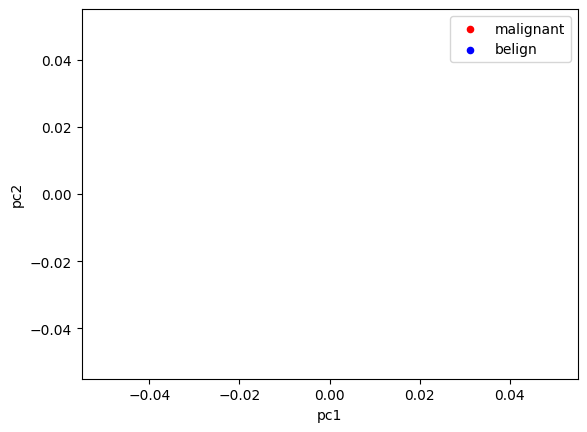

In [18]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');

# 良性をプロット
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='belign', ax=ax);

plt.show()